<a href="https://colab.research.google.com/github/RajkumarGalaxy/StructuredData/blob/master/Giotto_Time_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GIOTTO-TIME

References:

https://docs-time.giotto.ai/

https://github.com/giotto-ai/giotto-time

In [ ]:
!pip install giotto-time

# Plotting Time-Series data with Giotto-Time

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from gtime.preprocessing import TimeSeriesPreparation
from gtime.plotting import seasonal_plot, seasonal_subplots, lag_plot, acf_plot

Load the Kansas Wheat Index data

In [ ]:
df_sp = pd.read_csv('https://storage.googleapis.com/l2f-open-models/giotto-time/examples/data/WheatTr.csv', sep='\t')
df_column = df_sp.set_index('Effective date ')['S&P GSCI Kansas Wheat']

Convert the data into PeriodicIndex format and fill the missing values

In [ ]:
df_column.index = pd.to_datetime(df_column.index)
time_series_preparation = TimeSeriesPreparation(output_name='Wheat price index')
period_index_time_series = time_series_preparation.transform(df_column)
df = period_index_time_series.resample('D').fillna(method='ffill')

Calculate log returns and generate a returns data

In [ ]:
returns = (np.log(df / df.shift(1))).dropna()
returns.columns = ['Wheat price returns']

Plot the Wheat price index and returns

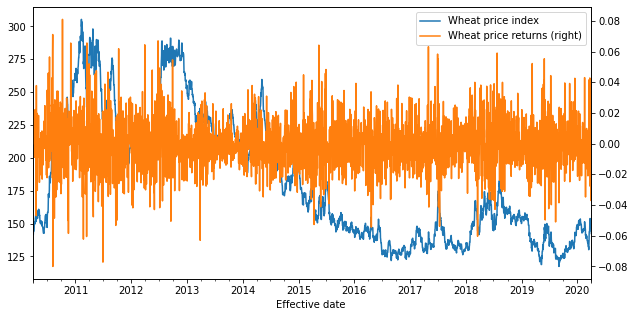

In [ ]:
ax = df.plot(figsize=(10, 5))
ax = returns.plot(ax=ax, secondary_y=True)

Seasonal Plot

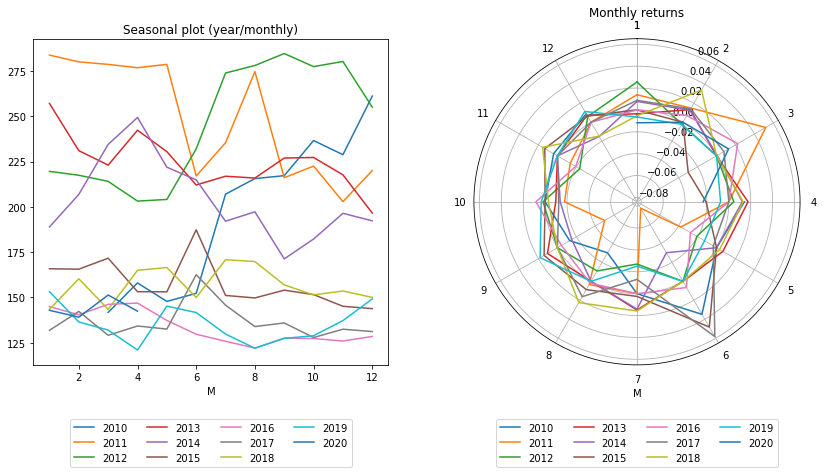

In [ ]:
fig = plt.figure(figsize=(14, 6))
m1 = fig.add_subplot(121, title='Seasonal plot (year/monthly)')
seasonal_plot(df, 'year', freq='M', agg='last', ax=m1)
m2 = fig.add_subplot(122, projection='polar')
seasonal_plot(returns, 'year', freq='M', agg='last', ax=m2, polar=True)
m2.set_title('Monthly returns');

[]

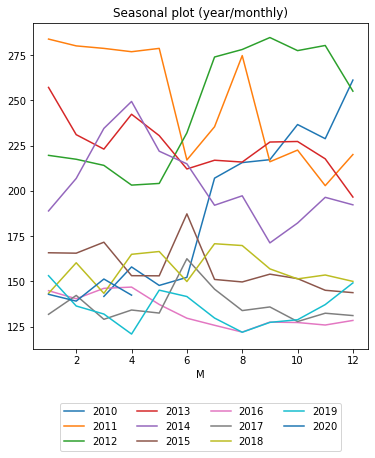

In [ ]:
fig = plt.figure(figsize=(6,6))
m1 = fig.add_subplot(111, title='Seasonal plot (year/monthly)')
seasonal_plot(df, 'year', freq='M', agg='last', ax=m1)
plt.plot()

[]

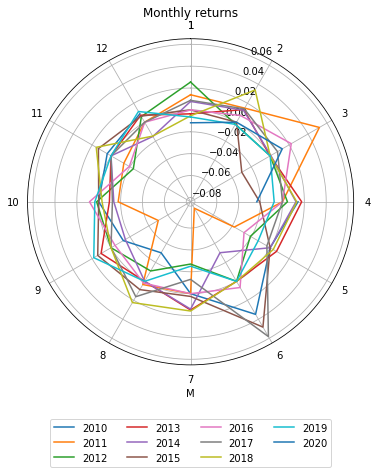

In [ ]:

fig = plt.figure(figsize=(6, 6))
m2 = fig.add_subplot(111, projection='polar')
seasonal_plot(returns, 'year', freq='M', agg='last', ax=m2, polar=True)
m2.set_title('Monthly returns')
plt.plot()

Seasonal plot of Returns

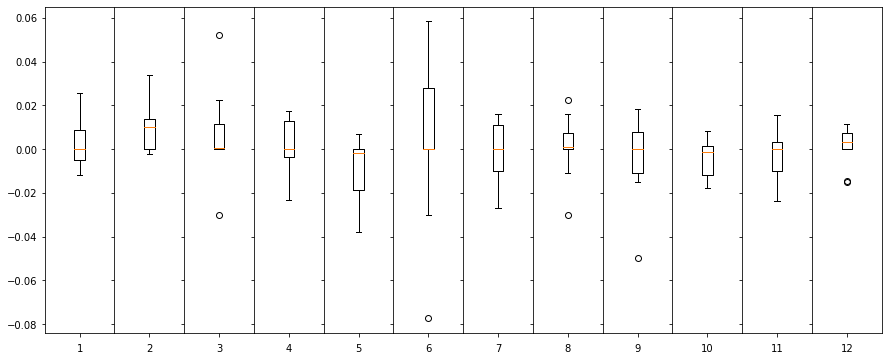

In [ ]:
#plt.figure(figsize=(8,4))
seasonal_subplots(returns, 'year', 'M', agg='last', box=True);
plt.show()

Lag plot

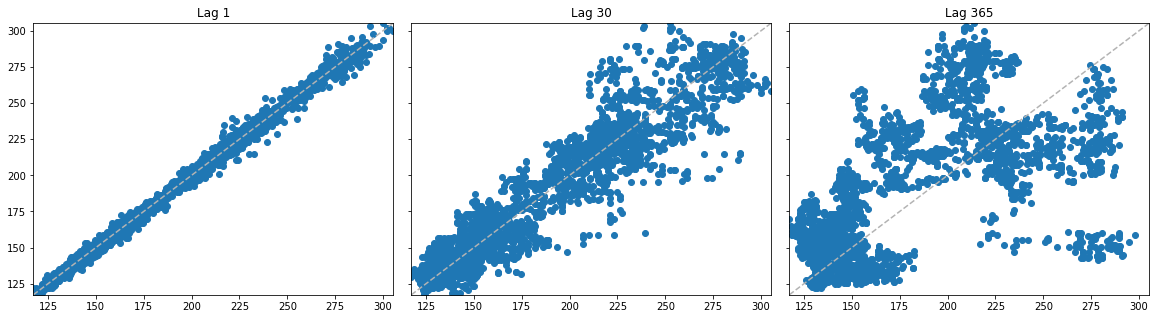

In [ ]:
lag_plot(df, lags=[1, 30, 365])
plt.show()

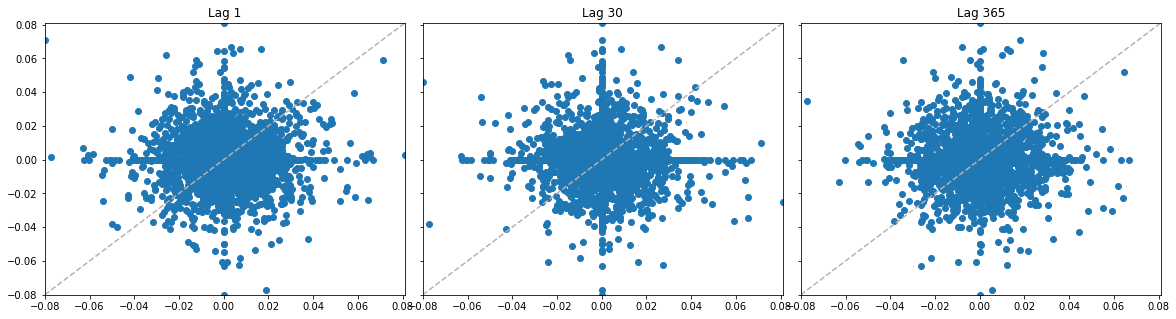

In [ ]:
lag_plot(returns, lags=[1, 30, 365])
plt.show()

Auto Correlation and Partial Auto Correlation plots

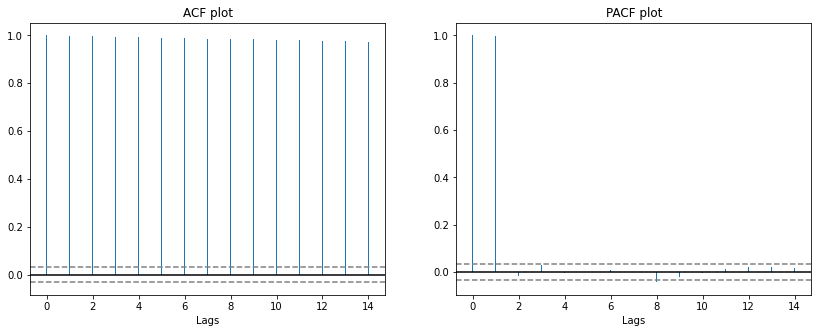

In [ ]:
fig = plt.figure(figsize=(14, 5))
a1 = fig.add_subplot(121, title='ACF plot')
acf_plot(df, max_lags=15, ax=a1)
a2 = fig.add_subplot(122, title='PACF plot')
acf_plot(df, max_lags=15, ax=a2, partial=True)
plt.show()

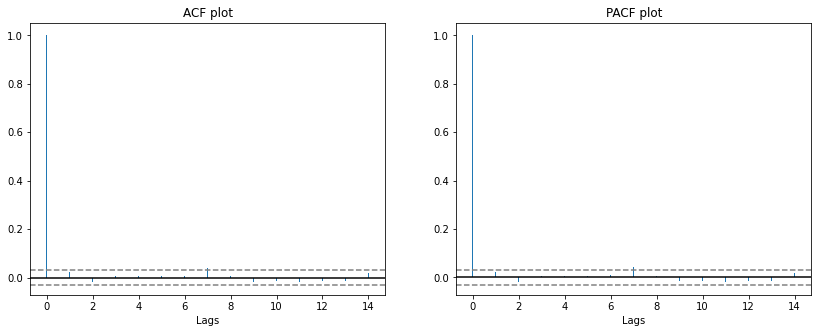

In [ ]:
fig = plt.figure(figsize=(14, 5))
a1 = fig.add_subplot(121, title='ACF plot')
acf_plot(returns, max_lags=15, ax=a1)
a2 = fig.add_subplot(122, title='PACF plot')
acf_plot(returns, max_lags=15, ax=a2, partial=True)
plt.show()